In [189]:
# System Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import common, chapter_04

# Reload Libraries
importlib.reload(chapter_04)
importlib.reload(common)

# Check GPU
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


---
# **Binary Classifier — Imdb**
---

In [12]:
def one_hot(samples, dimension):
    new_samples = np.zeros(shape=(samples.shape[0], dimension))
    for index, values in enumerate(samples):
        new_samples[index][values] = 1
    return new_samples

In [13]:
num_words = 1000
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
x_train = one_hot(x_train, num_words)
x_test = one_hot(x_test, num_words)

In [65]:
model = keras.Sequential(
    [
        keras.Input(shape=(num_words)),
        keras.layers.Dense(units=16, activation=tf.nn.relu),
        keras.layers.Dense(units=1, activation=tf.nn.sigmoid),
    ]
)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()],
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
)

In [66]:
filepath = "../resources/models/tmp/model.keras"
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_binary_accuracy", patience=2),
    keras.callbacks.ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True),
    keras.callbacks.TensorBoard(log_dir="../resources/logs/"),
]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    callbacks=callbacks,
    epochs=10,
    batch_size=512,
    verbose=False,
)

Metrics: 
loss, binary_accuracy, val_loss, val_binary_accuracy, 


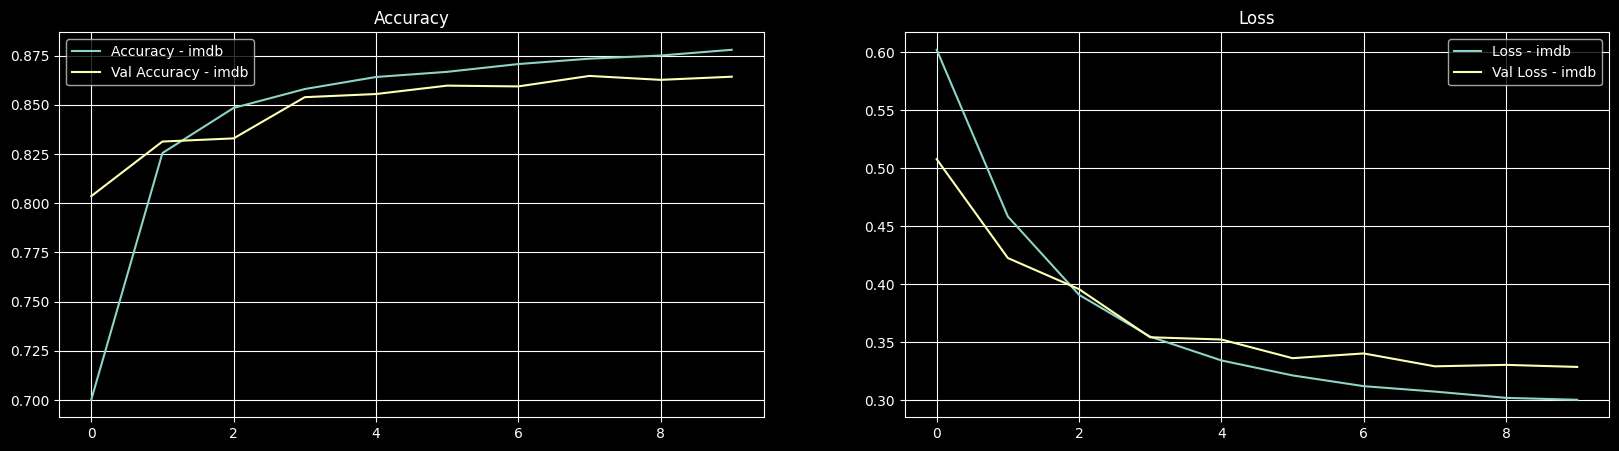

In [67]:
common.plot(data=[history], labels=["imdb"])

In [68]:
model.evaluate(x=x_test, y=y_test, verbose=False)

[0.33109983801841736, 0.85944002866745]

---
# **Muticlass Classifier — Reuters**
---

In [92]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=num_words)
x_train = one_hot(x_train, num_words)
x_test = one_hot(x_test, num_words)
x_train, y_train = common.shuffle_data(x_train, y_train)

In [105]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(num_words)),
        keras.layers.Dense(units=256, activation=tf.nn.relu),
        keras.layers.Dense(units=46, activation=tf.nn.softmax),
    ]
)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
)

In [106]:
filepath = "../resources/models/tmp/model.keras"
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_sparse_categorical_accuracy", patience=2),
    keras.callbacks.ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True),
    keras.callbacks.TensorBoard(log_dir="../resources/logs/"),
]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.3,
    callbacks=callbacks,
    epochs=30,
    batch_size=512,
    verbose=False,
)

Metrics: 
loss, sparse_categorical_accuracy, val_loss, val_sparse_categorical_accuracy, 


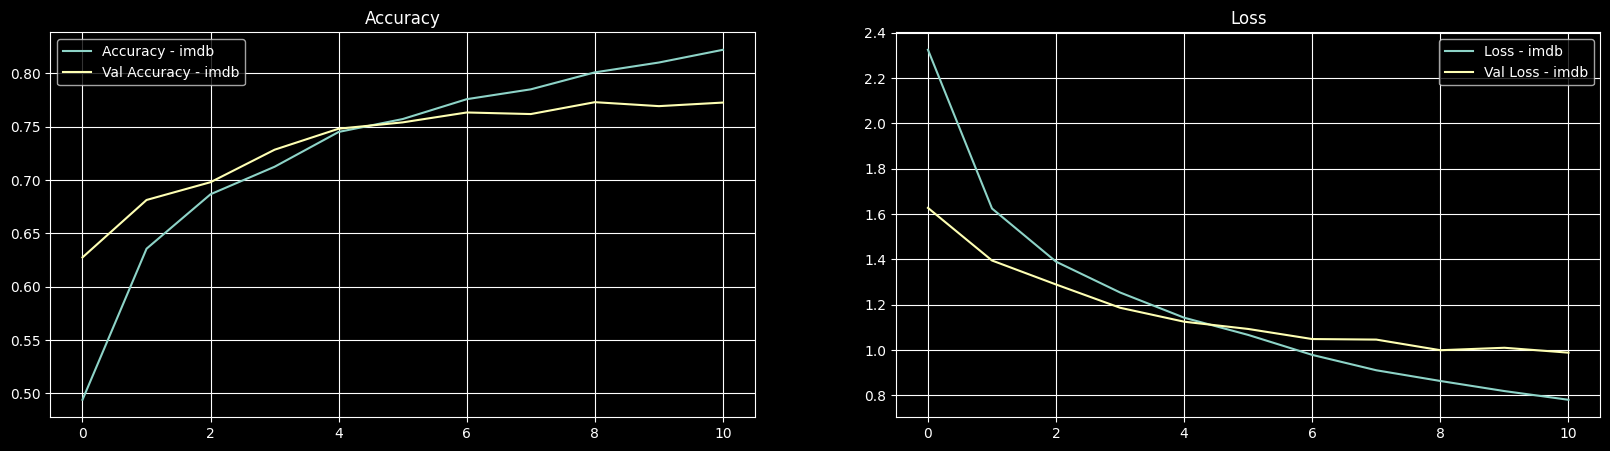

In [107]:
common.plot(data=[history], labels=["imdb"])

In [108]:
model.evaluate(x=x_test, y=y_test, verbose=False)

[1.026507019996643, 0.7666963338851929]

---
# **Non-Linear Scalar Regression**
---

In [150]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
indices = np.random.permutation(len(x_train))
x_train, y_train = x_train[indices], y_train[indices]
mean = x_train.mean()
x_train -= mean
std = x_train.std()
x_train /= std
x_test -= mean
x_test /= std
val_percentage = 0.3
val_size = int(0.3 * len(x_train))
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

In [160]:
model = keras.Sequential(
    [
        keras.Input(shape=(13)),
        keras.layers.Dense(units=120, activation=tf.nn.relu),
        keras.layers.Dense(units=120, activation=tf.nn.relu),
        keras.layers.Dense(units=1, activation=None),
    ]
)
model.compile(
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanAbsoluteError()],
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
)

In [161]:
filepath = "../resources/models/tmp/model.keras"
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error", patience=2),
    keras.callbacks.ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True),
    keras.callbacks.TensorBoard(log_dir="../resources/logs/"),
]
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    epochs=400,
    batch_size=1024,
    verbose=False,
)

Metrics: 
loss, mean_absolute_error, val_loss, val_mean_absolute_error, 


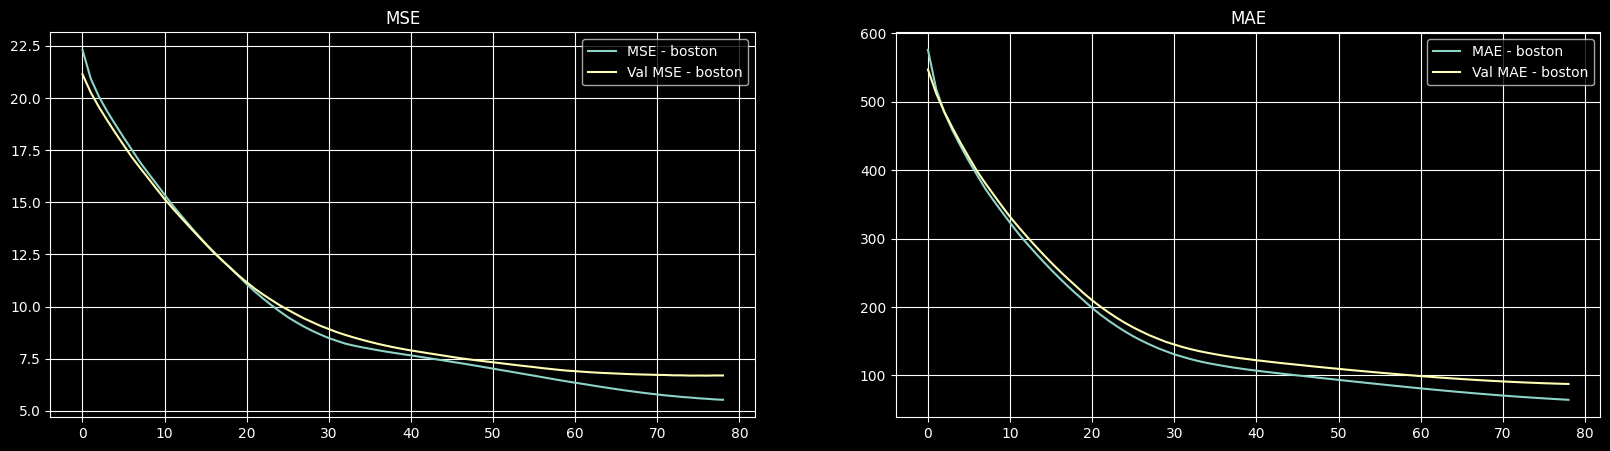

In [162]:
common.plot(data=[history], labels=["boston"], window_titles=["MSE", "MAE"])

In [163]:
model.evaluate(x=x_test, y=y_test, verbose=False)

[70.6004409790039, 6.021641254425049]

In [190]:
x = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12],
        [13, 14, 15, 16],
    ]
)


def kfold(x, num_folds=4):
    fold_size = len(x) // num_folds
    for fold_count in range(num_folds):
        val = x[fold_count : (fold_count + 1) * fold_size]
        train = np.concatenate([x[:fold_count], x[(fold_count + 1) * fold_size :]], axis=0)
        d = 0


common.explore_k_fold()